In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gsd.hoomd

In [2]:
traj = gsd.hoomd.open('./DATA/trajectory.gsd','r')

In [3]:
alpha_arr = []
vbias_arr = []
for frame in traj:
    
    alpha_arr.append(frame.log['meta_alchemy/MetaAlchemUpdater/alpha'][0])
    vbias_arr.append(frame.log['meta_alchemy/MetaAlchemUpdater/vbias'][0])

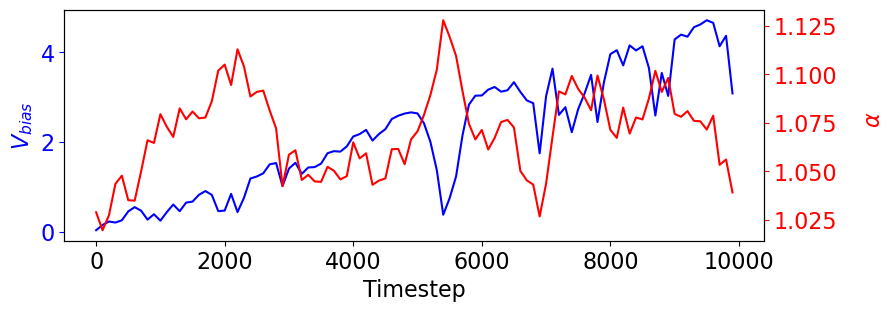

In [4]:
fig = plt.figure(figsize=(10,3))
axl=fig.add_subplot(111)
axr=axl.twinx()

axl.plot(np.arange(len(vbias_arr))*100, vbias_arr, 'b-', label='spectral gap')
axr.plot(np.arange(len(alpha_arr))*100, alpha_arr, 'r-', fillstyle='none', label='$\Lambda$')

axl.set_ylabel('$V_{bias}$', color='b', size=16)

axl.tick_params('y', colors='b', which='major', labelsize=16)

axr.set_ylabel('$\\alpha$', color='r', size=16)
axr.yaxis.set_label_coords(1.14, 0.525)
axr.tick_params('y', colors='r', which='major', labelsize=16)

axl.set_xlabel('Timestep', size=16)
axl.tick_params('x', colors='k', which='major', labelsize=16)

plt.gcf().subplots_adjust(left=0.15, right=0.85) # to make room for the label

plt.show()